<a href="https://colab.research.google.com/github/Andru-1987/86400_data_science_i_diplomatura/blob/main/07_aprendizaje_supervisado/clase_practica/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresion Lineal](https://cienciadedatos.net/documentos/py10-regresion-lineal-python)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")

poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = poblacion_india_df.loc[:, ["insulin", "skinthickness", "bmi", "diabetespedigreefunction"]]

*Division de  target y de caracteristicas predictivas*

In [5]:
target = 'diabetespedigreefunction'
X = df.drop(target, axis=1)
y = df[target]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   insulin        768 non-null    int64  
 1   skinthickness  768 non-null    int64  
 2   bmi            768 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 18.1 KB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: diabetespedigreefunction
Non-Null Count  Dtype  
--------------  -----  
768 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Preprocesamiento de Datos
- Encoding de Variables Categóricas
- Normalización/Estandarización

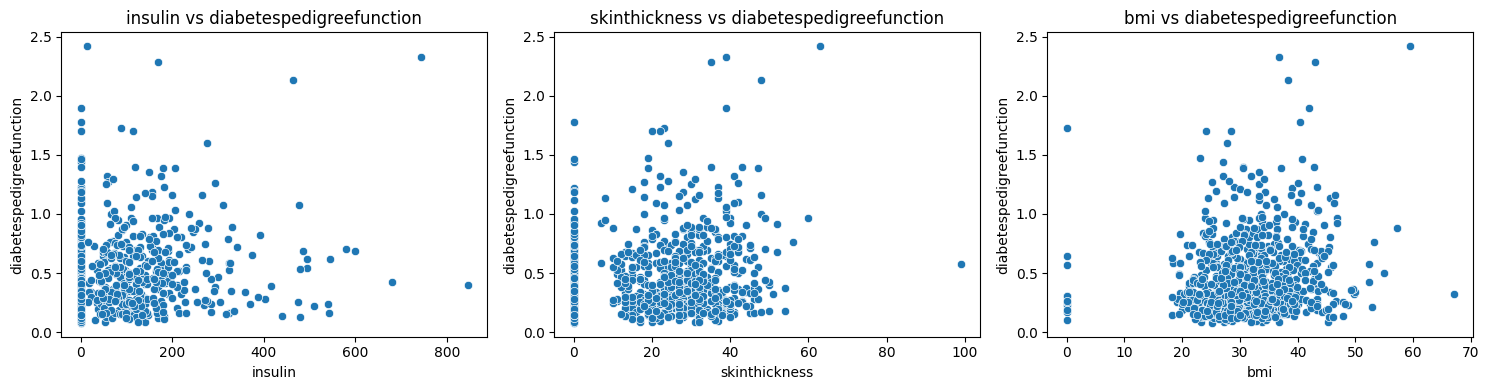

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

best_vars = ['insulin', 'skinthickness','bmi']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, var in enumerate(best_vars):
    sns.scatterplot(x=var, y='diabetespedigreefunction', data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs diabetespedigreefunction')
plt.tight_layout()
plt.show()


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de vuelta a DataFrame manteniendo nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,insulin,skinthickness,bmi
0,-0.692891,0.907270,0.204013
1,-0.692891,0.530902,-0.684422
2,-0.692891,-1.288212,-1.103255
3,0.123302,0.154533,-0.494043
4,0.765836,0.907270,1.409746


*Dividir los Datos*

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,insulin,skinthickness,bmi
60,-0.692891,-1.288212,-4.060474
618,-0.692891,0.217261,-0.481351
346,0.027790,-0.096379,-0.417892
294,-0.692891,-1.288212,-1.280942
231,2.519781,1.032726,1.803195


In [12]:
X_test.head()

,insulin,skinthickness,bmi
668,0.956860,0.781814,0.254780
324,-0.692891,0.719086,0.470543
624,-0.692891,-1.288212,-0.151361
690,-0.692891,-1.288212,-0.938260
473,-0.692891,-1.288212,-0.265588


*Modelado y Entrenamiento*

[Metricas de regression lineal](https://medium.com/@nicolasarrioja/m%C3%A9tricas-en-regresi%C3%B3n-5e5d4259430b)

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [14]:
X_const = sm.add_constant(X_scaled)

# Crear y ajustar modelo
model = sm.OLS(y, X_const)
results = model.fit()

# Mostrar resumen completo
print("\n" + results.summary().as_text())


                               OLS Regression Results                               
Dep. Variable:     diabetespedigreefunction   R-squared:                       0.052
Model:                                  OLS   Adj. R-squared:                  0.049
Method:                       Least Squares   F-statistic:                     14.08
Date:                      Mon, 10 Nov 2025   Prob (F-statistic):           6.11e-09
Time:                              04:24:25   Log-Likelihood:                -220.21
No. Observations:                       768   AIC:                             448.4
Df Residuals:                           764   BIC:                             467.0
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [15]:
print("INTERPRETACIÓN DE COEFICIENTES")

coef_df = pd.DataFrame({
    'Variable': X_const.columns,
    'Coeficiente': results.params,
    'p-value': results.pvalues,
    'Significativo': results.pvalues < 0.05
})

print(coef_df)

print("\n" + "-" * 80)
print("¿Cómo interpretar?")
print("-" * 80)
print("""
Coeficiente: Por cada unidad que aumenta X, Y cambia en ese valor
  Ejemplo: superficie_m2 = 2000 → por cada m² adicional, 
           el precio aumenta $2000 (manteniendo el resto constante)

p-value: Significancia estadística
  - p < 0.05: Variable significativa ✓
  - p > 0.05: Variable NO significativa (puede eliminarse)

R²: Porcentaje de varianza explicada
  - R² cercano a 1: Excelente ajuste
  - R² cercano a 0: Mal ajuste
""")

INTERPRETACIÓN DE COEFICIENTES
                    Variable  Coeficiente        p-value  Significativo
const                  const     0.471876  3.499917e-192           True
insulin              insulin     0.042024   1.246442e-03           True
skinthickness  skinthickness     0.032543   1.881272e-02           True
bmi                      bmi     0.025480   4.493464e-02           True

--------------------------------------------------------------------------------
¿Cómo interpretar?
--------------------------------------------------------------------------------

Coeficiente: Por cada unidad que aumenta X, Y cambia en ese valor
  Ejemplo: superficie_m2 = 2000 → por cada m² adicional, 
           el precio aumenta $2000 (manteniendo el resto constante)

p-value: Significancia estadística
  - p < 0.05: Variable significativa ✓
  - p > 0.05: Variable NO significativa (puede eliminarse)

R²: Porcentaje de varianza explicada
  - R² cercano a 1: Excelente ajuste
  - R² cercano a 0: Mal a

In [ ]:
print("MÉTRICAS DE BONDAD DE AJUSTE")


print(f"R² (R-squared):           {results.rsquared:.4f}")
print(f"R² ajustado:              {results.rsquared_adj:.4f}")
print(f"AIC:                      {results.aic:.2f}")
print(f"BIC:                      {results.bic:.2f}")

# Predicciones
y_pred = results.predict(X_const)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE:                     {rmse:,.2f}")

MÉTRICAS DE BONDAD DE AJUSTE
R² (R-squared):           0.0524
R² ajustado:              0.0487
AIC:                      448.43
BIC:                      467.00
RMSE:                     $0.32
